In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")


In [ ]:
x_train_dt = x_train.astype('float32')
y_train_dt = y_train.astype('float32')
x_test_dt = x_test.astype('float32')
y_test_dt = y_test.astype('float32')

x_train.astype('float32').shape ,x_train_dt.shape

((30000,), (30000,))

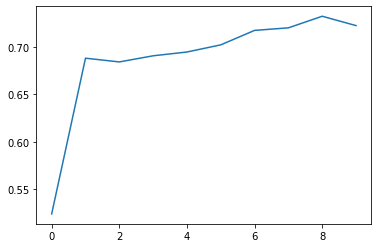

In [ ]:
model_tf = keras.Sequential([
  layers.Flatten(input_shape = (28,28)),
 # layers.Dense(128, activation = 'relu'),
  layers.Dense(10, activation = 'sigmoid')                        
                                          
])

model_tf.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

tf_fitter=model_tf.fit(x_train_dt,y_train_dt, epochs = 130,verbose = 0)

plt.plot(tf_fitter.history['accuracy'])

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
acc_per_fold = []
loss_per_fold = []


    

In [ ]:
k_folder = KFold(n_splits=5)
y_train.shape,x_train.shape
cv_scores = []

In [ ]:
for train, test in k_folder.split( x_train, y_train):
  model_cv = keras.Sequential([

      layers.Flatten(input_shape=(28,28)),
      layers.Dense(128,activation='relu'),
      layers.Dense(10,activation = 'sigmoid')
  ])

  model_cv.compile(
      optimizer = 'adam',
      loss='sparse_categorical_crossentropy',
      metrics =['accuracy']
    

  )

  model_cv.fit(x_train[train],y_train[test],epochs = 5)
  scores = model_cv.evaluate(x_train[train],y_train[test])
  cv_scores.append(scores[1])

Epoch 1/3
938/938 [==============================] - 2s 2ms/step - loss: 5.9012 - accuracy: 0.0988
Epoch 2/3
938/938 [==============================] - 2s 2ms/step - loss: 5.5882 - accuracy: 0.0987
Epoch 3/3
938/938 [==============================] - 2s 2ms/step - loss: 5.5878 - accuracy: 0.0987
Epoch 1/3
938/938 [==============================] - 2s 2ms/step - loss: 2.6228 - accuracy: 0.0988
Epoch 2/3
938/938 [==============================] - 2s 2ms/step - loss: 2.3052 - accuracy: 0.0987
Epoch 3/3
938/938 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.0987


In [ ]:
cv_scores

[0.0987333357334137,
 0.09876666963100433,
 0.09870000183582306,
 0.0987333357334137]

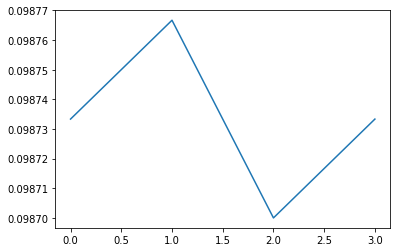

In [ ]:
plt.plot(cv_scores)

In [ ]:
plt.plot()